In [1]:
import pandas as pd
import numpy as np
import math as mt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def calculations(line_length, interval_length, processing_time, processing_sites, line):
    lambda_ =  line_length/interval_length
    print('-------------------------------------------------Входной поток заявок--------------------------------------------------------')
    print('Интенсивность входного потока (лямбда):\n {}'.format(lambda_))
    print('-------------------------------------------------Выходной поток заявок--------------------------------------------------------')
    mu = 1/processing_time 
    print('Интенсивность выходного потока (Mu):\n {}'.format(mu))
    print('-------------------------------------------------Нагруженность системы--------------------------------------------------------')    
    p = lambda_/mu
    print('Показатель нагруженности системы:\n {}'.format(p))
    k = processing_sites + line
    help_list_sites = [(p**i)/mt.factorial(i) for i in range(0,processing_sites+1)]
    help_list_line = [(p**i)/(processing_sites**(i-processing_sites)*mt.factorial(processing_sites)) for i in range(processing_sites+1, k+1) ]
    help_list = help_list_sites + help_list_line
    p0 = sum(help_list)**(-1)
    p_list = ['P'+ str(i) for i in range(k+1)]
    probability = [i*p0 for i in help_list]
    df_probability = ["{:.2%}".format(i) for i in probability]
    df = pd.DataFrame(df_probability, index = p_list)
    df = df.T
    display(df)
    print('Состояние системы: \n')
    labels_1 = p_list
    data_1 = [round(i,2) for i in probability]
    color_0 = ['lightgray']
    color_1 = ['turquoise' for i in range(processing_sites)]
    color_2 = ['lightsalmon' for i in range(line)]
    color_all = color_0 + color_1 + color_2
    x1 = np.arange(len(labels_1))
    width = 0.1  # the width of the bars
    fig, ax = plt.subplots(figsize=(14,8))
    rects1 = ax.bar(x1, data_1, color=color_all, width = 0.5, edgecolor = 'grey')
    ax.set_ylabel('Вероятность')
    ax.set_title('Состояние системы')
    ax.set_xticks(x1, labels_1)
    ax.set(facecolor = 'seashell')
    ax.bar_label(rects1, padding=3)
    fig.tight_layout()
    plt.show()
    print('--------------------------------------------------Характеристики для клиента----------------------------------------------')
    p_rejection = probability[-1]
    print("Вероятность отказа в обслуживании: \n {}".format("{:.2%}".format(p_rejection)))
    p_lineup = sum(probability[processing_sites+1:k+1])
    print("Вероятность встать в очередь: \n {}".format("{:.2%}".format(p_lineup)))
    line_length = ((p**(processing_sites+1))*(1-(p/processing_sites)**line*(line+1-line*p/processing_sites))*p0/(processing_sites*mt.factorial(processing_sites)*((1-p/processing_sites)**2)))
    print("Средняя длина очереди: \n {}".format(line_length))
    line_time = (line_length / (lambda_*(1-p_rejection)))
    print("Среднее время ожидания в очереди: \n {}".format(line_time))
    print('-------------------------------------------------Характеристики для владельца----------------------------------------------')
    absolute_bandwidth = lambda_*(1-p_rejection)
    print("Абсолютная пропускная способность: \n {}".format(absolute_bandwidth))
    relative_bandwidth_capacity = 1 - p_rejection
    print("Относительная пропускная способность: \n {}".format(relative_bandwidth_capacity))
    median_busy_sites = absolute_bandwidth/mu
    print("Среднее количество занятых касс: \n {}".format(median_busy_sites))
    downtime_rate = 1-median_busy_sites/processing_sites
    print("Коэффициент простоя: \n {}".format("{:.2%}".format(downtime_rate)))

def run():
    print('---------------Вас приветствует полу-юзерфрендли интерфейс решения задачи систем массового обслуживания!---------------')
    print('\n'.join(' '.join(*zip(*row)) for row in ([["*" if row==0 and col%3!=0 or row==1 and col%3==0 or row-col==2 or row+col==8 else " " for col in range(7)] for row in range(6)])))
    line_length1 = float(input('Введите длину очереди: \n')) #длина очереди,N
    interval_length1 = float(input('Введите длину интервала: \n')) #длина интервала, t
    processing_time1 = float(input('Введите время обработки 1 заявки: \n')) #Время оплаты, t
    processing_sites1 = int(input('Введите количество мест обработки: \n')) #количество касс
    line1 = int(input('Введите максимальную длину очереди: \n')) #максимальная длина очереди
    calculations(line_length1, interval_length1, processing_time1, processing_sites1, line1)
    continue_ = input('Хотите ли вы продолжить дорожайший пользователь?\n(Да или нет)\n')
    continue_ = continue_.lower()
    index = continue_.find('да')
    if index != -1:
        run()

---------------Вас приветствует полу-юзерфрендли интерфейс решения задачи систем массового обслуживания!---------------
  * *   * *  
*     *     *
*           *
  *       *  
    *   *    
      *      
Введите длину очереди: 
5
Введите длину интервала: 
10
Введите время обработки 1 заявки: 
4
Введите количество мест обработки: 
9
Введите максимальную длину очереди: 
15
-------------------------------------------------Входной поток заявок--------------------------------------------------------
Интенсивность входного потока (лямбда):
 0.5
-------------------------------------------------Выходной поток заявок--------------------------------------------------------
Интенсивность выходного потока (Mu):
 0.25
-------------------------------------------------Нагруженность системы--------------------------------------------------------
Показатель нагруженности системы:
 2.0


,P0,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24
0,13.53%,27.07%,27.07%,18.04%,9.02%,3.61%,1.20%,0.34%,0.09%,0.02%,...,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%


Состояние системы: 



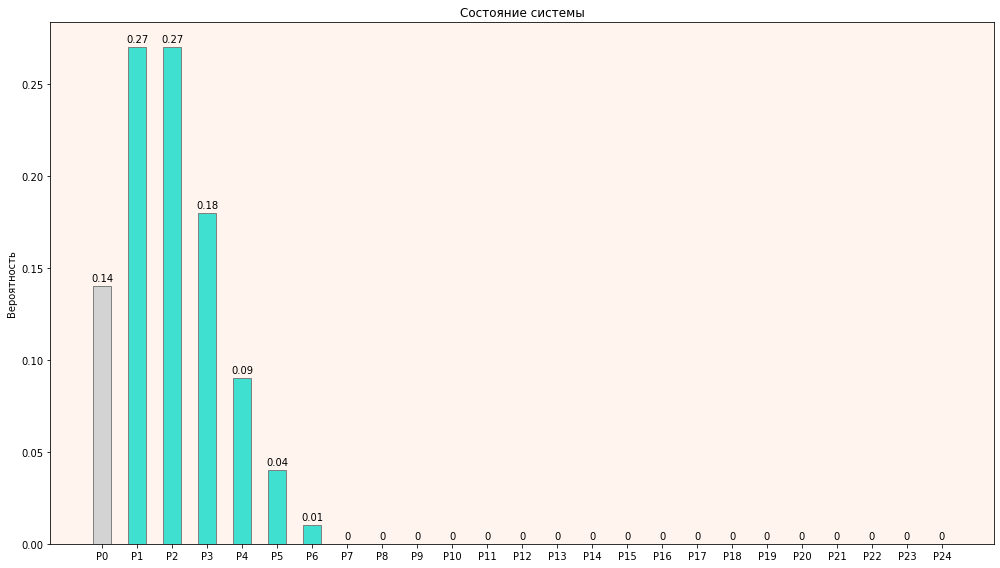

--------------------------------------------------Характеристики для клиента----------------------------------------------
Вероятность отказа в обслуживании: 
 0.00%
Вероятность встать в очередь: 
 0.01%
Средняя длина очереди: 
 7.014405821845192e-05
Среднее время ожидания в очереди: 
 0.0001402881164369081
-------------------------------------------------Характеристики для владельца----------------------------------------------
Абсолютная пропускная способность: 
 0.4999999999999848
Относительная пропускная способность: 
 0.9999999999999696
Среднее количество занятых касс: 
 1.9999999999999392
Коэффициент простоя: 
 77.78%
Хотите ли вы продолжить дорожайший пользователь?
(Да или нет)
да
---------------Вас приветствует полу-юзерфрендли интерфейс решения задачи систем массового обслуживания!---------------
  * *   * *  
*     *     *
*           *
  *       *  
    *   *    
      *      
Введите длину очереди: 
5
Введите длину интервала: 
10
Введите время обработки 1 заявки: 
4
Введите

,P0,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12
0,11.20%,22.39%,22.39%,14.93%,9.95%,6.64%,4.42%,2.95%,1.97%,1.31%,0.87%,0.58%,0.39%


Состояние системы: 



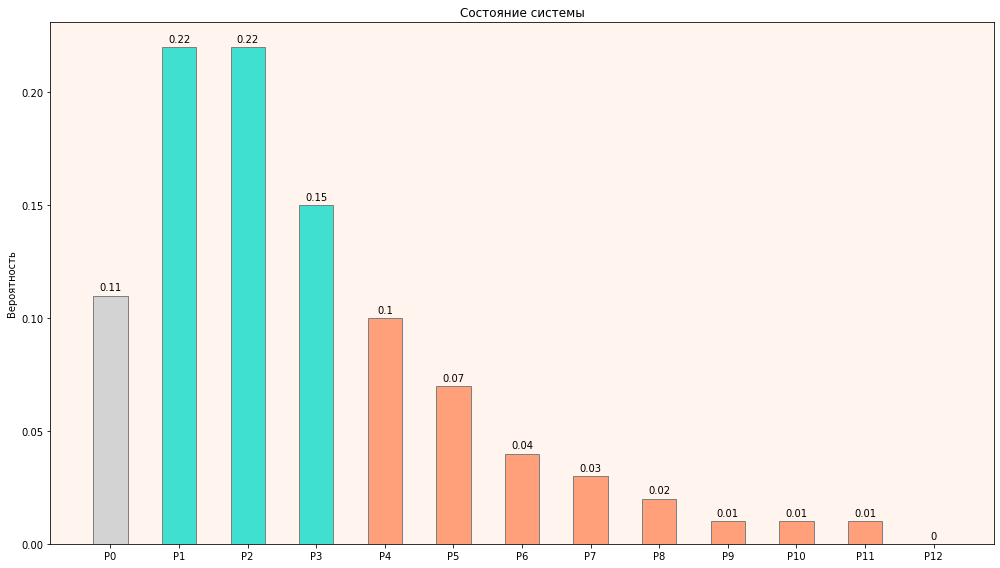

--------------------------------------------------Характеристики для клиента----------------------------------------------
Вероятность отказа в обслуживании: 
 0.39%
Вероятность встать в очередь: 
 29.08%
Средняя длина очереди: 
 0.8025865420170852
Среднее время ожидания в очереди: 
 1.6114312474657186
-------------------------------------------------Характеристики для владельца----------------------------------------------
Абсолютная пропускная способность: 
 0.4980581971953844
Относительная пропускная способность: 
 0.9961163943907688
Среднее количество занятых касс: 
 1.9922327887815376
Коэффициент простоя: 
 33.59%
Хотите ли вы продолжить дорожайший пользователь?
(Да или нет)
нет


In [3]:
try:
    run() #ДЛЯ РАБОТЫ ЗАПУСТИТЬ ЭТУ ЧАСТЬ КОДА
except:
    print('Что-то пошло не так. Запустите код заново<3<3<3')